# 0.1 - Setup

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl 

In [2]:
# Setting matplotlib to display graphs in notebook

%matplotlib inline

# Q.2 - Import your data and conduct any necessary cleaning, manipulations, and reprocessing.

In [3]:
# Defining File path
path = r'/Users/joefeuille/CF Analysis/Spotify Analysis'

In [4]:
# Importing master data set
master = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'global_master.pkl'))

In [5]:
master.shape

(15722, 29)

In [6]:
master.head()

,Position,Track Name,Artist,Streams,URL,Week,Country,Country_Code,Track ID,Album,...,Speechiness,Tempo,Time_Signature,Key,Mode,Valence,Duration,Explicit,Markets,_merge
0,1,STAY (with Justin Bieber),The Kid LAROI,2031338.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/30/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
1,1,STAY (with Justin Bieber),The Kid LAROI,2260974.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/23/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
2,1,STAY (with Justin Bieber),The Kid LAROI,2277839.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/16/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
3,1,STAY (with Justin Bieber),The Kid LAROI,2367836.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/09/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both
4,1,STAY (with Justin Bieber),The Kid LAROI,2535418.0,https://open.spotify.com/track/5PjdY0CKGZdEuoN...,09/02/21,Australia,AU,5PjdY0CKGZdEuoNab3yDmX,F*CK LOVE 3: OVER YOU,...,0.0483,169.928,4.0,1,1,0.478,141806,True,"[AD, AE, AG, AL, AM, AO, AR, AT, AU, AZ, BA, B...",both


In [7]:
master.dtypes

Position               int64
Track Name            object
Artist                object
Streams              float64
URL                   object
Week                  object
Country               object
Country_Code          object
Track ID              object
Album                 object
Release_date          object
Length               float64
Popularity           float64
Acousticness         float64
Danceability         float64
Energy               float64
Instrumentalness     float64
Liveness             float64
Loudness             float64
Speechiness          float64
Tempo                float64
Time_Signature       float64
Key                    int64
Mode                   int64
Valence              float64
Duration               int64
Explicit                bool
Markets               object
_merge              category
dtype: object

In [8]:
# Selecting solely numerical columns for analysis

selected = master[['Position', 'Streams', 'Length', 'Popularity',
                  'Acousticness', 'Danceability', 'Energy', 'Instrumentalness',
                  'Liveness', 'Loudness', 'Speechiness', 'Tempo',
                  'Time_Signature', 'Key', 'Valence']]

In [9]:
# Creating new df with only Selected columns

df = selected.copy()

In [10]:
df.shape

(15722, 15)

In [11]:
df.head()

,Position,Streams,Length,Popularity,Acousticness,Danceability,Energy,Instrumentalness,Liveness,Loudness,Speechiness,Tempo,Time_Signature,Key,Valence
0,1,2031338.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478
1,1,2260974.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478
2,1,2277839.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478
3,1,2367836.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478
4,1,2535418.0,141805.0,93.0,0.0383,0.591,0.764,0.0,0.103,-5.484,0.0483,169.928,4.0,1,0.478


Text(0.5, 1.0, 'Raw data - Streams v. Instr')

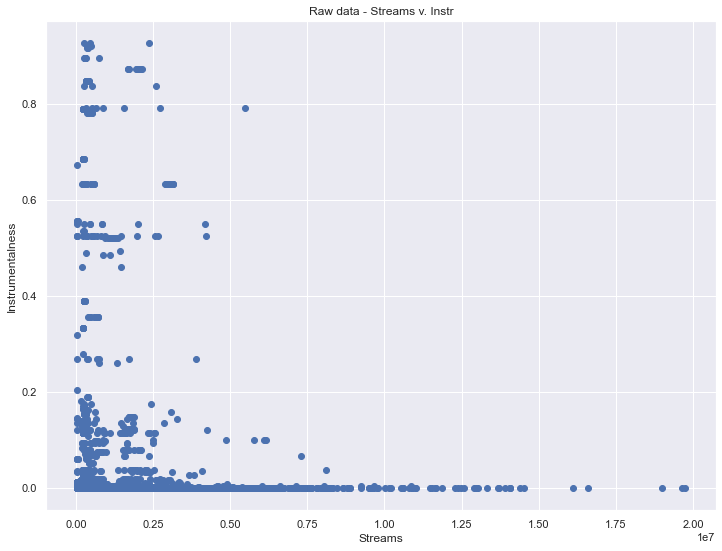

In [12]:
# Visualizing the raw data for a test case

plt.figure(figsize = (12,9))
plt.scatter(df[['Streams']], df[['Instrumentalness']])
plt.xlabel ('Streams')
plt.ylabel ('Instrumentalness')
plt.title ('Raw data - Streams v. Instr')

# Q.3 - Use the elbow technique as shown in the Jupyter notebook for this Exercise.

In [13]:
num_cl = range(1,15) # Defines range of potential clusters
kmeans = [KMeans(n_clusters=i) for i in num_cl] #Defines k-means clusters according to range

In [14]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))]

score

[-2.43179461879923e+16,
 -1.030809545250701e+16,
 -5057318587867474.0,
 -2992797688421025.0,
 -2049617692772659.0,
 -1439533422016515.2,
 -1114431818934944.9,
 -878090951681183.6,
 -738901897105997.5,
 -599966552438512.1,
 -505847291950362.1,
 -430247859531909.3,
 -365055167858623.44,
 -317642691269732.1]

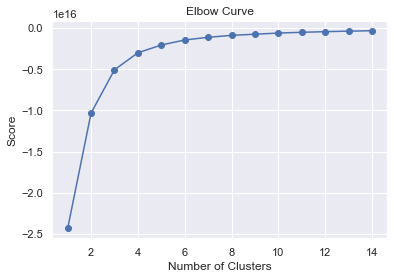

In [15]:
# Plotting elbow curve

pl.plot(num_cl, score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### The optimal number of clusters is a bit vague here. I'm choosing 4 clusters as "where the curve begins to flatten out." However, I will also be running a secondary analysis for each individual country, which might give us a better curve to our elbow.

# Q.5 - Run the k-means algorithm.

In [16]:
# Creating kmeans object.

kmeans = KMeans(n_clusters = 4, n_jobs = -1)

In [17]:
# Fitting k-means object to the data

kmeans.fit(df)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=4, n_jobs=-1)

# Q.6 - Attach a new column to your dataframe with the resulting clusters as shown in the Exercise

In [18]:
df['cluster'] = kmeans.fit_predict(df)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


In [19]:
df['cluster'].value_counts()

0    12068
3     2990
2      587
1       77
Name: cluster, dtype: int64

# Q.7 - Create a few different visualizations (e.g., scatterplots) using your clustered data. 

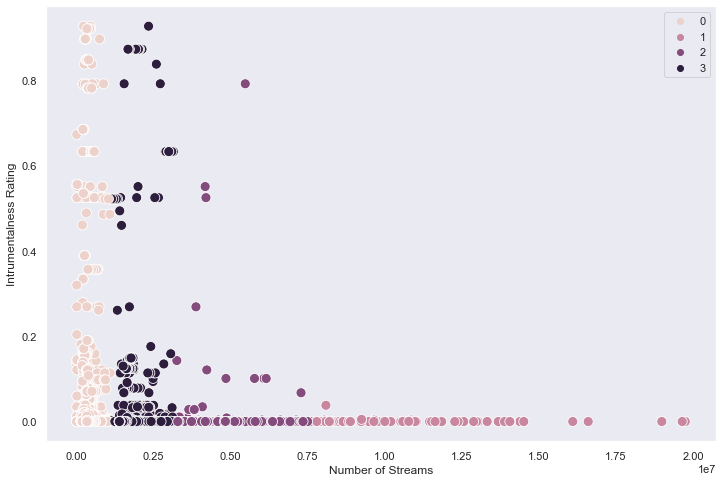

In [20]:
# Plotting clusters for 'Streams' and 'Instrumentalness'

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Streams'], y=df['Instrumentalness'],
                    hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Number of Streams')
plt.ylabel('Intrumentalness Rating')
plt.show()

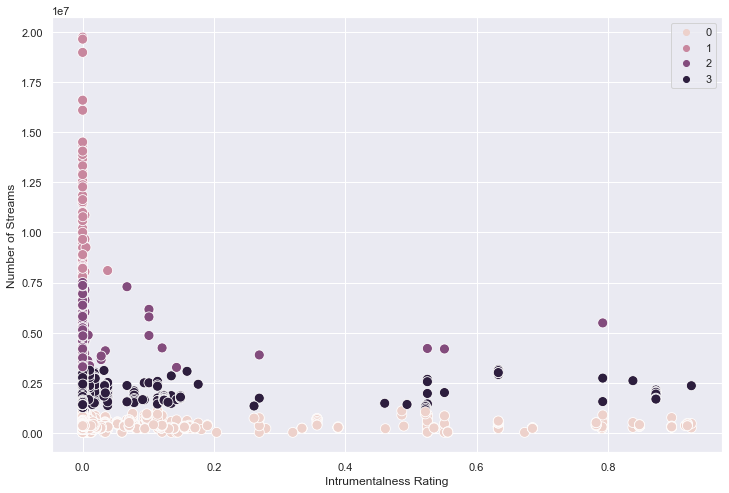

In [21]:
# Plotting clusters for the inverse

plt.figure(figsize=(12,8))
ax_1 = sns.scatterplot(x=df['Instrumentalness'], y=df['Streams'],
                    hue=kmeans.labels_, s=100)

ax.grid(False)
plt.xlabel('Intrumentalness Rating')
plt.ylabel('Number of Streams')
plt.show()

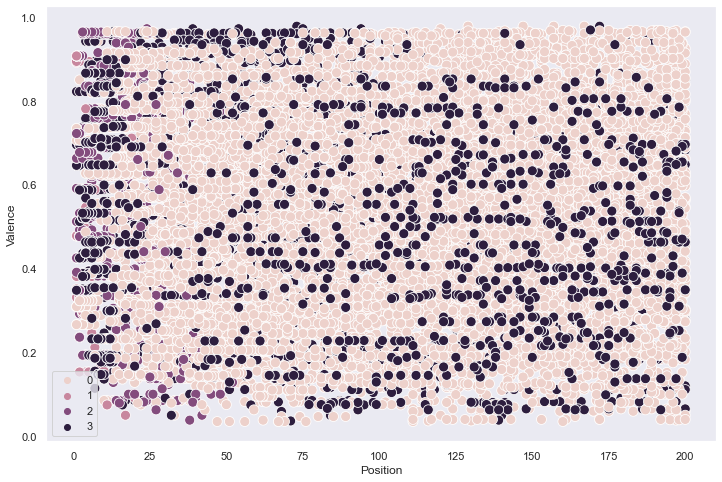

In [22]:
# Plotting clusters for 'Position' and 'Valence'

plt.figure(figsize=(12,8))
ax_2 = sns.scatterplot(x=df['Position'], y=df['Valence'],
                    hue=kmeans.labels_, s=100)

ax_2.grid(False)
plt.xlabel('Position')
plt.ylabel('Valence')
plt.show()

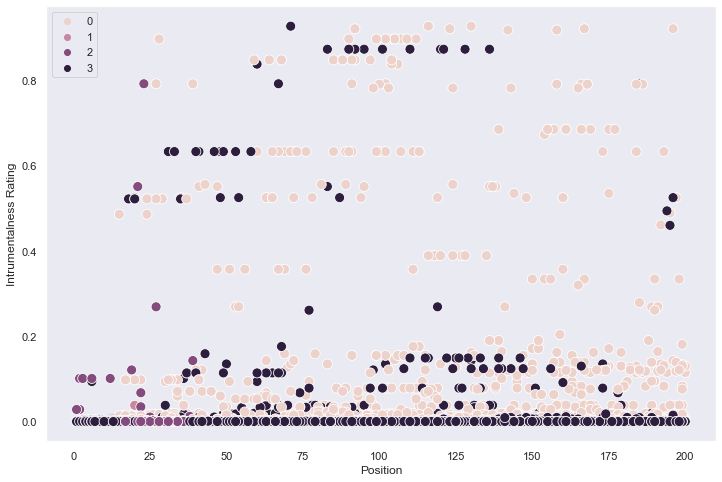

In [23]:
# Plotting clusters for 'Position' and 'Instrumentalness'

plt.figure(figsize=(12,8))
ax_3 = sns.scatterplot(x=df['Position'], y=df['Instrumentalness'],
                    hue=kmeans.labels_, s=100)

ax_3.grid(False)
plt.xlabel('Position')
plt.ylabel('Intrumentalness Rating')
plt.show()

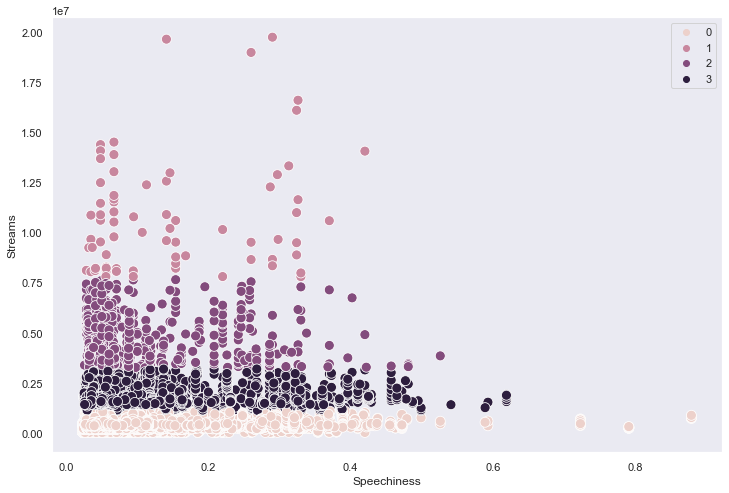

In [24]:
# Plotting clusters for 'Speechiness' and 'Streams'

plt.figure(figsize=(12,8))
ax_3 = sns.scatterplot(x=df['Speechiness'], y=df['Streams'],
                    hue=kmeans.labels_, s=100)

ax_3.grid(False)
plt.xlabel('Speechiness')
plt.ylabel('Streams')
plt.show()

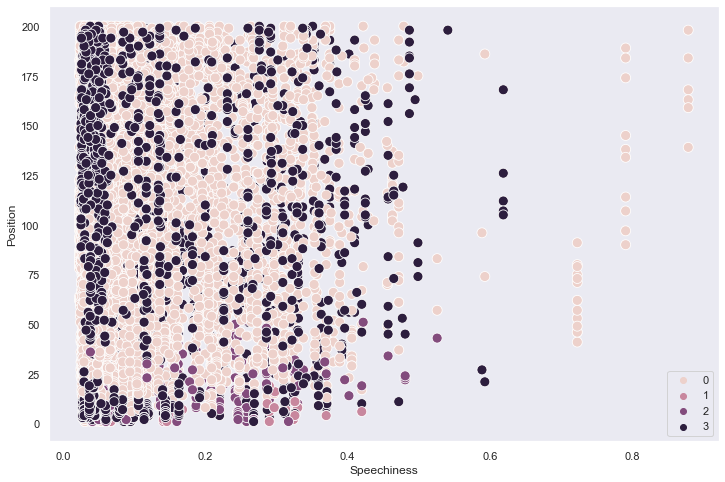

In [29]:
# Plotting clusters for 'Speechiness' and 'Popularity'

plt.figure(figsize=(12,8))
ax_3 = sns.scatterplot(x=df['Speechiness'], y=df['Position'],
                    hue=kmeans.labels_, s=100)

ax_3.grid(False)
plt.xlabel('Speechiness')
plt.ylabel('Position')
plt.show()

# Q.8 - Discuss how and why the clusters make sense.

### The clusters make the most sense in light of their Streams values. But when you compare clusters by Streams, there are some very clear and helpful insights. Cluster #1 (in light purple), for instance, are the most played songs in our entire data set. And they stand out from the crowd in many aspects

### For example, in our first and second scatterplots, we see that Cluster #1 dominates the set in terms of the number of Streams, and that same cluster rates nearly perfectly ZERO for Instrumentalness. This means that the most played songs in our list. The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Therefore, the most played songs MUST CONTAIN VOCALS.

### As our fifth plot demonstrates, songs in Cluster #1 rate 0.3 or lower for the Speechiness. Speechiness detects the presence of spoken words in a track. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music.

### Therefore, the most streamed songs must contain music and vocals, but rap music is unlikely to find its way into Cluster #1.

# Q.9 - Calculate the descriptive statistics for your clusters using the groupby() function and discuss your findings.

In [32]:
df.loc[df['cluster'] == 3, 'grouping'] = 'black'
df.loc[df['cluster'] == 2, 'grouping'] = 'dark purple'
df.loc[df['cluster'] == 1, 'grouping'] = 'purple'
df.loc[df['cluster'] == 0, 'grouping'] = 'pink'

In [37]:
global_desc_stats = df.groupby('grouping').agg({'Position':['mean', 'median'], 
                         'Streams':['mean', 'median'], 
                         'Length':['mean', 'median'],
                          'Popularity':['mean', 'median'],
                           'Acousticness':['mean', 'median'],
                           'Danceability':['mean', 'median'],
                           'Energy':['mean', 'median'],
                           'Instrumentalness':['mean', 'median'],
                           'Liveness':['mean', 'median'],
                           'Loudness':['mean', 'median'],
                           'Speechiness':['mean', 'median'],
                           'Tempo':['mean', 'median'],
                           'Time_Signature':['mean', 'median'],
                           'Key':['mean', 'median'],
                           'Valence':['mean', 'median']})

global_desc_stats

Position              Streams                     Length  \
                   mean median          mean      median           mean   
grouping                                                                  
black         81.303679     74  1.835216e+06   1709285.0  195261.598997   
dark purple   17.499148     16  4.608601e+06   4281906.0  195028.688245   
pink         109.517981    112  3.888712e+05    335732.0  213057.470418   
purple         5.259740      4  1.076595e+07  10008872.0  213814.038961   

                      Popularity        Acousticness          ... Speechiness  \
               median       mean median         mean  median  ...        mean   
grouping                                                      ...               
black        187585.0  79.712709   80.0     0.259114  0.1920  ...    0.111164   
dark purple  190161.0  84.258944   84.0     0.321645  0.3020  ...    0.103569   
pink         207481.0  71.160010   70.0     0.283021  0.1980  ...    0.086599   
purple       212352.0  88.779221   88.0     0.215921  0.0635  ...    0.143495   

                          Tempo           Time_Signature              Key  \
             median        mean    median           mean median      mean   
grouping                                                                    
black        0.0637  125.932664  124.9630       3.964883    4.0  5.037793   
dark purple  0.0603  123.847455  126.0260       3.993186    4.0  5.703578   
pink         0.0523  121.776528  121.8385       3.974312    4.0  5.372638   
purple       0.0944  134.761935  145.8870       3.961039    4.0  5.363636   

                     Valence          
            median      mean  median  
grouping                              
black            5  0.545977  0.5505  
dark purple      6  0.571994  0.5890  
pink             5  0.527037  0.5250  
purple           5  0.500312  0.4780  

[4 rows x 30 columns]

### If we look at Cluster #1 (labeled: Purple) we see that it has the highest median Position, the largest number of Streams, and the highest Popularity ranking. I'm impressed by how well the k-means algorithm grouped our data. And I'm excited to see what new insights this clustering provides.

In [38]:
global_desc_stats.to_clipboard()

# Q.10 - Propose what these results could be useful for in future steps of an analytics pipeline.

### This cluster analysis for the Global data set has been illuminating. I will perform a similar analysis for each country's individual music data. This may help us understand what makes each country's musical preferences unique.